Week 9: PDEs

The Earth’s ground temperature just below the surface can be treated as a diffusion problem with time-varying boundary conditions, as the mean surface temperature changes on a timescale of months.
Use dftcs.py as a starting point for a program to model the time-dependent temperature profile of the surface, i.e. T (z, t) where z is the depth.
 Run your simulation up to a depth of 20 m.

Natural time scale of a single step: 2.04e-02
Solution is expected to be stable.


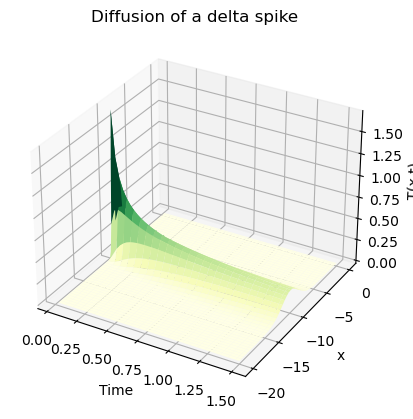

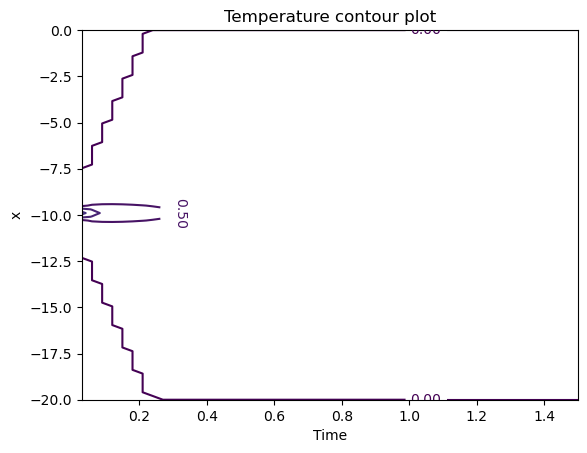

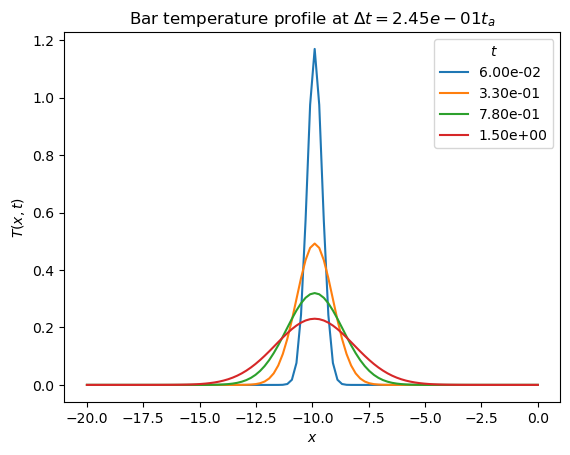

In [27]:
# dftcs - Program to solve the diffusion equation using Forward Time Centered Space (FTCS) scheme

# Set up configuration options and special features
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm



# Initialize parameters (time step, grid spacing, etc.)
tau = 0.005
N = 100
L = 20.0  # The system extends from x = -L to 0
h = L/(N-1)  # Grid size dx
kappa = 1.0  # Diffusion coefficient
coeff = kappa*tau/h**2
t_natural = h**2/(2*kappa)

print('Natural time scale of a single step: {0:.2e}'.format(h**2/(2*kappa)))

if coeff < 0.5:
    print('Solution is expected to be stable.')
else:
    print('Warning! Solution is expected to be unstable. Consider smaller dt or larger dx.')


# Set initial and boundary conditions.
tt = np.zeros(N)  # Initialize temperature to be zero at all points.
tt[int(N/2)] = 1.0/h  # Set initial condition: delta function of high temperature in the center
# The boundary conditions are tt[0] = tt[N-1] = 0

# Set up loop and plot variables.
xplot = np.arange(N)*h - L  # Record the x scale for plots
iplot = 0  # Counter used to count plots
nstep = 300  # Maximum number of iterations
nplots = 50  # Number of snapshots (plots) to take
plot_step = nstep/nplots  # Number of time steps between plots

# Loop over the desired number of time steps.
ttplot = np.empty((N, nplots))
tplot = np.empty(nplots)

## MAIN LOOP ##
for istep in range(nstep):
    # Compute new temperature using FTCS scheme. All points in space are updated at once.
    # Note that the endpoints (boundary) is not updated.
    tt[1:N-1] = tt[1:N-1] + coeff*(tt[2:N] + tt[0:N-2] - 2*tt[1:N-1])

    # Periodically record temperature for plotting.
    if (istep + 1) % plot_step < 1:  # record data for plot every plot_step number of steps. Don't record first step.
        ttplot[:, iplot] = np.copy(tt)  # record a copy of tt(i) for plotting
        tplot[iplot] = (istep+1)*tau  # record time for plots
        iplot += 1

# Plot temperature versus x and t as a wire-mesh plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
Tp, Xp = np.meshgrid(tplot, xplot)
ax.plot_surface(Tp, Xp, ttplot, rstride=2, cstride=2, cmap='YlGn')
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel(r'T(x,t)')
ax.set_title('Diffusion of a delta spike')

# Plot temperature versus x and t as a contour plot
fig2, ax2 = plt.subplots()
levels = np.linspace(0.0, 10.0, num=21)
ct = ax2.contour(tplot, xplot, ttplot, levels)
ax2.clabel(ct, fmt='%1.2f')
ax2.set_xlabel('Time')
ax2.set_ylabel('x')
ax2.set_title('Temperature contour plot')

# Plot 1D slices of the temperature distribution vs. space at short and long times
fig3, ax3 =plt.subplots()
ax3.set_title(r'Bar temperature profile at $\Delta t = {0:.2e}t_a$'.format(tau/t_natural))
ax3.plot(xplot, ttplot[:, 1], label='{0:.2e}'.format(tplot[1]))
ax3.plot(xplot, ttplot[:, 10], label='{0:.2e}'.format(tplot[10]))
ax3.plot(xplot, ttplot[:, 25], label='{0:.2e}'.format(tplot[25]))
ax3.plot(xplot, ttplot[:, -1], label='{0:.2e}'.format(tplot[-1]))
ax3.legend(title=r'$t$')
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$T(x, t)$')

plt.show()


a) The thermal diffusion coefficient is κ = 0.1 m2 day−1. What is the expected diffusion timescale tD ?

In [24]:

L = 20.0  # The system extends from x = -L to 0
kappa = 0.1  # Diffusion coefficient
t_D = L**2/(2*kappa)
print(f'Diffusion timescale is approximately {t_D} days')

Diffusion timescale is approximately 2000.0 days


b) The initial conditions are T = 10◦ C everywhere except at the boundaries. The boundary conditions are T = 11◦ C at a depth of 20 m (owing to heat from the core) and T = 10◦ C at the surface. Implement these boundary conditions in your program.

Natural time scale of a single step: 5.05e-02
Solution is expected to be stable.


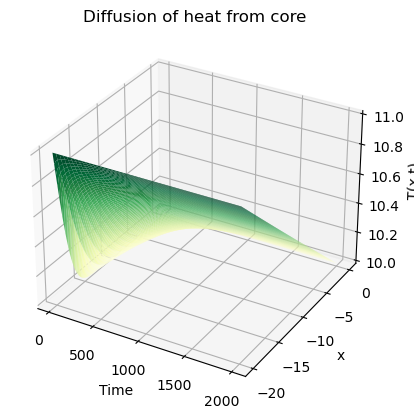

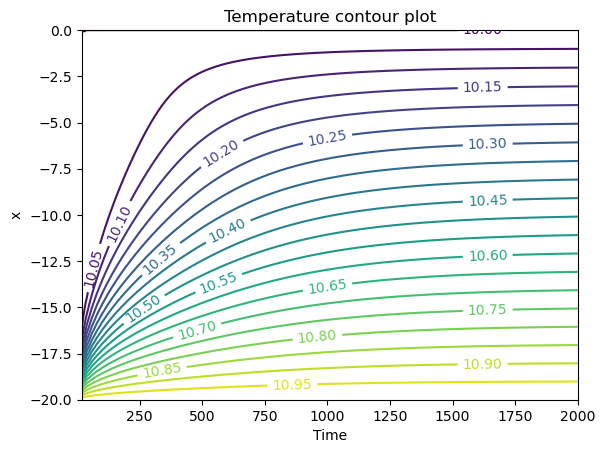

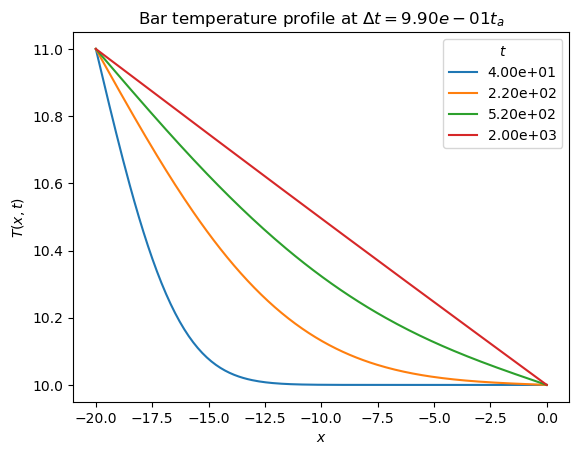

In [48]:
# dftcs - Program to solve the diffusion equation using Forward Time Centered Space (FTCS) scheme

# Set up configuration options and special features
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm



# Initialize parameters (time step, grid spacing, etc.)
tau = 0.05
N = 200
L = 20.0  # The system extends from x = -L to 0
h = L/(N-1)  # Grid size dx
kappa = 0.1  # Diffusion coefficient
coeff = kappa*tau/h**2
t_natural = h**2/(2*kappa)

print('Natural time scale of a single step: {0:.2e}'.format(h**2/(2*kappa)))

if coeff < 0.5:
    print('Solution is expected to be stable.')
else:
    print('Warning! Solution is expected to be unstable. Consider smaller dt or larger dx.')


# Set initial and boundary conditions.
tt = 10*np.ones(N)  # Initialize temperature to be 10 at all points.
tt[0]=11  # Set initial condition: 11 degrees at depths, 10 degrees at surface
tt[N-1] = 10


# Set up loop and plot variables.
xplot = np.arange(N)*h - L  # Record the x scale for plots
iplot = 0  # Counter used to count plots
nstep = int(np.ceil(t_D/tau))  # Maximum number of iterations
nplots = 100  # Number of snapshots (plots) to take
plot_step = nstep/nplots  # Number of time steps between plots

# Loop over the desired number of time steps.
ttplot = np.empty((N, nplots))
tplot = np.empty(nplots)

## MAIN LOOP ##
for istep in range(nstep):
    # Compute new temperature using FTCS scheme. All points in space are updated at once.
    # Note that the endpoints (boundary) is not updated.
    tt[1:N-1] = tt[1:N-1] + coeff*(tt[2:N] + tt[0:N-2] - 2*tt[1:N-1])

    # Periodically record temperature for plotting.
    if (istep + 1) % plot_step < 1:  # record data for plot every plot_step number of steps. Don't record first step.
        ttplot[:, iplot] = np.copy(tt)  # record a copy of tt(i) for plotting
        tplot[iplot] = (istep+1)*tau  # record time for plots
        iplot += 1

# Plot temperature versus x and t as a wire-mesh plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
Tp, Xp = np.meshgrid(tplot, xplot)
ax.plot_surface(Tp, Xp, ttplot, rstride=2, cstride=2, cmap='YlGn')
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel(r'T(x,t)')
ax.set_title('Diffusion of heat from core')

# Plot temperature versus x and t as a contour plot
fig2, ax2 = plt.subplots()
levels = np.linspace(10.0, 11.0, num=21)
ct = ax2.contour(tplot, xplot, ttplot, levels)
ax2.clabel(ct, fmt='%1.2f')
ax2.set_xlabel('Time')
ax2.set_ylabel('x')
ax2.set_title('Temperature contour plot')

# Plot 1D slices of the temperature distribution vs. space at short and long times
fig3, ax3 =plt.subplots()
ax3.set_title(r'Bar temperature profile at $\Delta t = {0:.2e}t_a$'.format(tau/t_natural))
ax3.plot(xplot, ttplot[:, 1], label='{0:.2e}'.format(tplot[1]))
ax3.plot(xplot, ttplot[:, 10], label='{0:.2e}'.format(tplot[10]))
ax3.plot(xplot, ttplot[:, 25], label='{0:.2e}'.format(tplot[25]))
ax3.plot(xplot, ttplot[:, -1], label='{0:.2e}'.format(tplot[-1]))
ax3.legend(title=r'$t$')
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$T(x, t)$')

plt.show()


c) Choose reasonable values for the space and time intervals and the number of spatial grid points.
Justify your choices in your write-up.
Run the system forward in time and discuss the results.
Confirm that the final temperature profile is as one would expect after a time tD.

Challenge question: Now, change the surface temperature boundary condition to be the following function of time:

$$T(t) = A + B\,sin \bigl( \frac{2\pi t}{\tau} \bigr) $$
where A = 10 C, B = 12 C, and $\tau$ = 365 days.
Run the system long enough for it to settle down into a stable pattern, then plot T (z) for each for the 4 seasons.

Natural time scale of a single step: 5.05e-02
Solution is expected to be stable.


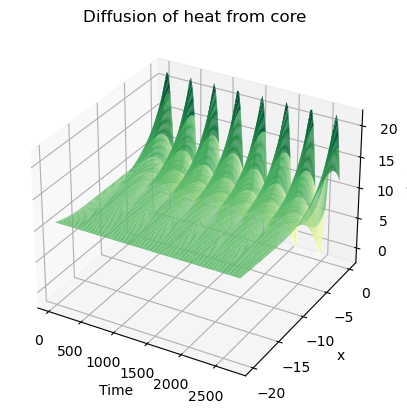

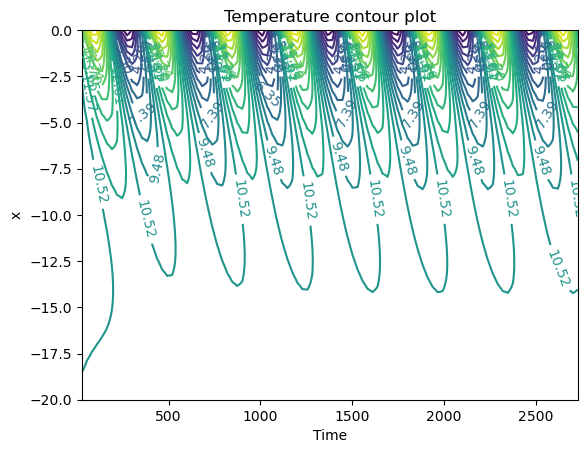

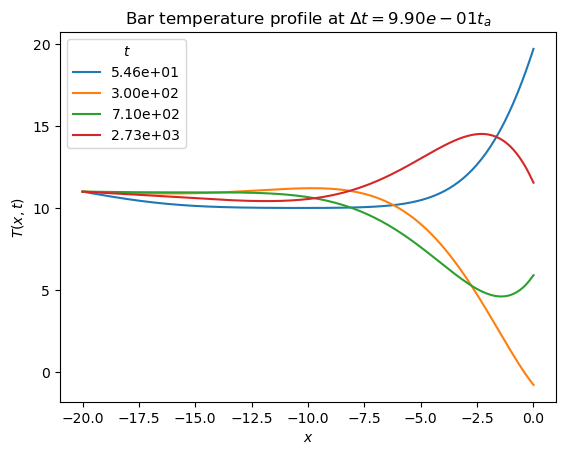

In [51]:
# dftcs - Program to solve the diffusion equation using Forward Time Centered Space (FTCS) scheme

# Set up configuration options and special features
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm



# Initialize parameters (time step, grid spacing, etc.)
tau = 0.05
N = 200
L = 20.0  # The system extends from x = -L to 0
h = L/(N-1)  # Grid size dx
kappa = 0.1  # Diffusion coefficient
coeff = kappa*tau/h**2
t_natural = h**2/(2*kappa)

print('Natural time scale of a single step: {0:.2e}'.format(h**2/(2*kappa)))

if coeff < 0.5:
    print('Solution is expected to be stable.')
else:
    print('Warning! Solution is expected to be unstable. Consider smaller dt or larger dx.')


# Set initial and boundary conditions.
tt = 10*np.ones(N)  # Initialize temperature to be 10 at all points.
tt[0]=11  # Set initial condition: 11 degrees at depths, 10 degrees at surface
tt[N-1] = 10


# Set up loop and plot variables.
xplot = np.arange(N)*h - L  # Record the x scale for plots
iplot = 0  # Counter used to count plots
nstep = int(np.ceil((t_D+365*2)/tau))  # Maximum number of iterations
nplots = 100  # Number of snapshots (plots) to take
plot_step = nstep/nplots  # Number of time steps between plots

# Loop over the desired number of time steps.
ttplot = np.empty((N, nplots))
tplot = np.empty(nplots)

## MAIN LOOP ##
for istep in range(nstep):
    tt[N-1]=10+12*np.sin(2*np.pi*tau*(istep+1)/365)
    # Compute new temperature using FTCS scheme. All points in space are updated at once.
    # Note that the endpoints (boundary) is not updated.
    tt[1:N-1] = tt[1:N-1] + coeff*(tt[2:N] + tt[0:N-2] - 2*tt[1:N-1])

    # Periodically record temperature for plotting.
    if (istep + 1) % plot_step < 1:  # record data for plot every plot_step number of steps. Don't record first step.
        ttplot[:, iplot] = np.copy(tt)  # record a copy of tt(i) for plotting
        tplot[iplot] = (istep+1)*tau  # record time for plots
        iplot += 1

# Plot temperature versus x and t as a wire-mesh plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
Tp, Xp = np.meshgrid(tplot, xplot)
ax.plot_surface(Tp, Xp, ttplot, rstride=2, cstride=2, cmap='YlGn')
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel(r'T(x,t)')
ax.set_title('Diffusion of heat from core')

# Plot temperature versus x and t as a contour plot
fig2, ax2 = plt.subplots()
levels = np.linspace(-2, 22.0, num=24)
ct = ax2.contour(tplot, xplot, ttplot, levels)
ax2.clabel(ct, fmt='%1.2f')
ax2.set_xlabel('Time')
ax2.set_ylabel('x')
ax2.set_title('Temperature contour plot')

# Plot 1D slices of the temperature distribution vs. space at short and long times
fig3, ax3 =plt.subplots()
ax3.set_title(r'Bar temperature profile at $\Delta t = {0:.2e}t_a$'.format(tau/t_natural))
ax3.plot(xplot, ttplot[:, 1], label='{0:.2e}'.format(tplot[1]))
ax3.plot(xplot, ttplot[:, 10], label='{0:.2e}'.format(tplot[10]))
ax3.plot(xplot, ttplot[:, 25], label='{0:.2e}'.format(tplot[25]))
ax3.plot(xplot, ttplot[:, -1], label='{0:.2e}'.format(tplot[-1]))
ax3.legend(title=r'$t$')
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$T(x, t)$')

plt.show()
